<h2>Testing Score Performance - Data Analysis</h2>
<br>Data Analysis from Excel to Python</br>
<br>Credits: https://towardsdatascience.com/a-complete-yet-simple-guide-to-move-from-excel-to-python-d664e5683039</br>
<br>Tableau: https://public.tableau.com/app/profile/shelley8818/viz/StudentTestPerformance_16595864356360/StudentDemographics

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr

In [2]:
#Read csv file from local drive
scores = pd.read_csv(r'Path\FileName.csv') #change this filepath and file name
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h3><b><br>Excel functions in Pandas</h3></b></br>
<br>Takes the overall statistics of a dataframe or the following functions can be used below: dataframe.describe()</br>
<br></br>
<br><li>Takes the average of a column: dataframe['column'].mean()</li></br>
<br><li>Obtains the max of a column: dataframe['column'].max()</li></br>
<br><li>Obtains the min of a column: dataframe['column'].min()</li></br>
<br><li>Counts the number of values in column: dataframe['column'].count()</li></br>
<br></br>
<br>Searches for any nulls in dataset (countblank in Excel): dataframe[dataframe['column'].isna()] or dataframe[dataframe['column'].isnull()]</br>
<br> Counts the number of unique values in dataset column: dataframe['column'].value_counts()

In [3]:
#Obtain statistics for dataset
scores.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
#Find any nulls in dataset
#Excel equivalent to countblank() or count()-counta()
nulls = scores[scores['gender'].isna()]
#is_null = scores[scores['gender'].isnull()]
nulls

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [5]:
#Calculate a new column with the average scores for each student
scores['average'] = scores.mean(axis=1)
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<h3>Excel Conditional Functions with NumPy

<h4><br>Conditional Function (IF statement)</br></h4>
&emsp; np.where(condition, True, False)
<br></br>
&emsp; np.select(conditions, choicelist) <b><em>(Nested IF statement)</em></b>

In [6]:
#Create new column to identify students that have passed or failed
scores['result'] = np.where(scores['average']>70, 'Pass', 'Fail')
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass


In [7]:
#Create new column to classify letter grades for each student's average score

conditions = [
    (scores['average']>=90),
    (scores['average']<90) & (scores['average']>=80),
    (scores['average']<80) & (scores['average']>=70),
    (scores['average']<70) & (scores['average']>=60),
    (scores['average']<60)
]

values = ['A','B','C','D','F']

scores['letter_grade'] = np.select(conditions, values)
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,result,letter_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


<h3>Additional Excel Function Examples in Pandas (cont'd)

In [ ]:
##Excel SUMIF example, can also be used for AVERAGEIF and COUNTIF

##One Condition
df_female = scores[scores['gender'] == 'female'] 
##Two Conditions
df_sumifs = scores[(scores['gender'] == 'female') & (scores['race/ethnicity'] == 'group B')] 

df_sumifs = df_sumifs.assign(sumifs = df_sumifs['math score'] + df_sumifs['reading score'] + df_sumifs['writing score'])

In [ ]:
##Example to change case of text

##Change title
scores['gender'].str.title()
##Change to Uppercase
scores['gender'].str.upper()
##Change to Lowercase
scores['gender'].str.lower()

##Overwrite the old text in column
scores['gender'] = scores['gender'].str.title()

In [ ]:
##Example of extracting specific text or substrings; This replaces Excel's TEXT formulas.

scores['race/ethnicity'].str.extract(r'([A-Z])') ##[A-Z] extracts capitalized letters
scores['lunch'].str.extract(r'([aeiou])') ##[aeiou] extracts vowels

<h4>Vlookups

In [8]:
##Generate an index for each row
scores = scores.reset_index()
scores = scores.rename(columns={'index':'id'})  #.reset_index(drop=True) ##Drops the index 
scores.head()

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,result,letter_grade
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


In [9]:
#Finding an element .loc[row,column]
scores.loc[100, ]

id                                      100
gender                                 male
race/ethnicity                      group B
parental level of education    some college
lunch                              standard
test preparation course                none
math score                               79
reading score                            67
writing score                            67
average                                  71
result                                 Pass
letter_grade                              C
Name: 100, dtype: object

In [10]:
#Findin a element with conditions
scores.loc[scores['id']==100, 'math score']

100    79
Name: math score, dtype: int64

<h4> Merging Tables</h4>
&emsp;<b>.concat()</b> stacks multiple DataFrame together either vertically, or stitches horizontally after aligning on index
<br>&emsp;<b>.merge()</b> aligns two DataFrame's selected common column(s) or index, and then pick up the remaining columns from the aligned rows of each DataFrame

In [ ]:
##Import the Tables
## excel_1 is the original dataframe used here. excel_2 is another data file used in the blog below:
# https://github.com/ifrankandrade/data_preprocessing/blob/main/datasets/LanguageScore.csv

excel_1 = 'StudentsPerformance.csv'
excel_2 = 'LanguageScore.csv'

df_excel_1 = pd.read_csv(excel_1)
df_excel_2 = pd.read_csv(excel_2)

In [ ]:
##Merging two tables (Similar to JOINS in SQL)
##pd.merge(left table, right table, on = 'common column', how = 'left, right, inner')

df_excel_3 = pd.merge(df_excel_1, df_excel_2, on='id', how='left')
df_excel_3['language score'].fillna('0', inplace=True)

In [ ]:
##pd.concat(df1.set_index('column'), df2.set_index('column')], axis = defaults to 0)

df_excel_3 = pd.concat([df_excel_1.set_index('id'), df_excel_2.set_index('id')], axis=1)
df_excel_3['language score'].fillna('0', inplace=True)

<h4>Pivot Tables

In [22]:
#Pivot Table that finds the math, reading and writing average scores of each race/ethnicity group 
df_pivot = scores.pivot_table(index='race/ethnicity', values=['math score', 'reading score', 'writing score'], aggfunc='mean')
df_pivot

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<h3>Creating Graphs in Matplotlib

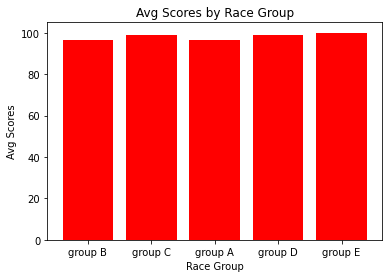

In [71]:
#Bar Graph

#plotting the points
plt.bar(scores['race/ethnicity'], scores['average'], color = ['red'])
  
# naming the x-axis
plt.xlabel('Race Group')
# naming the y-axis
plt.ylabel('Avg Scores')
# plot title
plt.title('Avg Scores by Race Group')
plt.show()

No handles with labels found to put in legend.


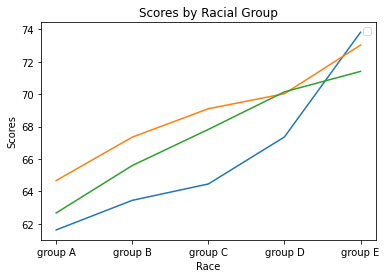

In [67]:
#Line Graph

# plotting the points 
plt.plot(df_pivot)
  
# naming the x axis
plt.xlabel('Race')
# naming the y axis
plt.ylabel('Scores')
  
# Title for graph
plt.title('Scores by Racial Group')

plt.legend() 
# function to show the plot
plt.show()

Group E has the highest Math, Reading and Writing scores. Group A has the lowest in all categories.

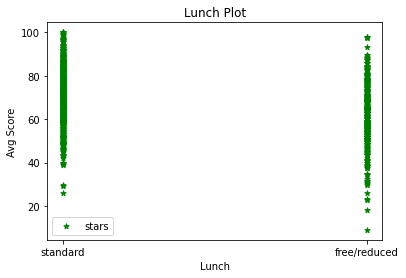

In [47]:
#Scatter Plot

plt.scatter(scores['lunch'], scores['average'], label= "stars", color= "green", 
            marker= "*", s=30)
  
# x-axis label
plt.xlabel('Lunch')
# frequency label
plt.ylabel('Avg Score')
# plot title
plt.title('Lunch Plot')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()

Students in the free/reduced lunch program are likely to score lower than students in the standard program.

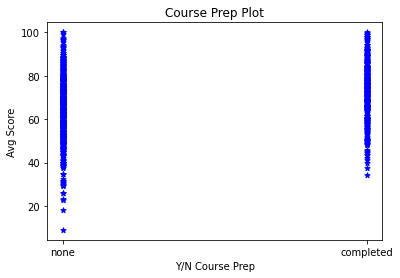

In [68]:
plt.scatter(scores['test preparation course'], scores['average'], label= "circles", color= "blue", 
            marker= "*", s=30)
  
# x-axis label
plt.xlabel('Y/N Course Prep')
# frequency label
plt.ylabel('Avg Score')
# plot title
plt.title('Course Prep Plot')
  
# function to show the plot
plt.show()

Students who have completed a course prep are more likely to score higher than peers that have not done a course prep.

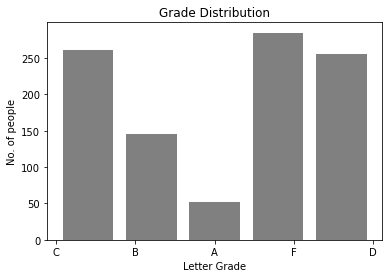

In [51]:
# Histogram

bins = 5
plt.hist(scores['letter_grade'], bins, color = 'grey',
        histtype = 'bar', rwidth = 0.8)
  
# x-axis label
plt.xlabel('Letter Grade')
# frequency label
plt.ylabel('No. of people')
# plot title
plt.title('Grade Distribution')
  
# function to show the plot
plt.show()

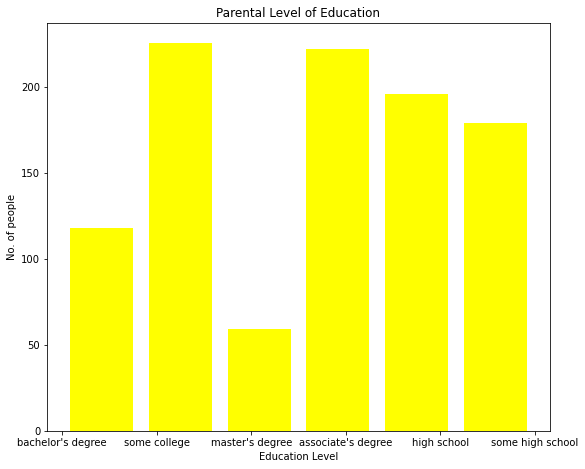

In [80]:
bins = 6
plt.hist(scores['parental level of education'], bins, color = 'yellow',
        histtype = 'bar', rwidth = 0.8)

plt.rcParams["figure.figsize"] = (7,10)
# x-axis label
plt.xlabel('Education Level')
# frequency label
plt.ylabel('No. of people')
# plot title
plt.title('Parental Level of Education')
  
# function to show the plot
plt.show()

<h3><br>Calculating Correlation of Variables</br></h3>
<br><b>Pearson correlation coefficient:</b> determines the linear relationship between two variables</br>
<br>&emsp;[-1,1] where -1 indicates negatively correlated and 1 indicates positively correlated

In [ ]:
##Calculate correlation between two variables
#np.corrcoef(var1, var2)

scores.corr()

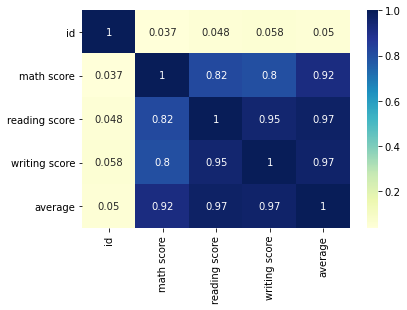

In [65]:
#Plot correlation
sns.heatmap(scores.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [54]:
#Defining variables to compare correlation coefficient with p-values
#p-value < 0.05 indicate statisically significant correlation between variables

var1 = scores['math score']
var2 = scores['reading score']
var3= scores['writing score']

In [56]:
pearsonr(var1, var2)

(0.817579663672054, 1.787753109905834e-241)

In [57]:
pearsonr(var1,var3)

(0.8026420459498078, 3.3760270425694173e-226)

In [58]:
pearsonr(var2,var3)

(0.9545980771462478, 0.0)

<h3>Exporting DataFrame to Excel

In [13]:
# writing to Excel
datatoexcel = pd.ExcelWriter('TestScores.xlsx')
  
# write DataFrame to excel
scores.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [14]:
#Downloads and Writes Excel file to local drive (sheet_name is optional)
scores.to_excel(r'Path\FileName.xlsx', sheet_name='Your sheet name', index = False)